In [7]:
import pandas as pd
from ast import literal_eval
import string
import matplotlib.pyplot as plt

In [2]:
def find_toxic_words(span, text):
    i = 0
    token = []
    a = 0

    word = []

    while (i < (len(span) - 1)):
        if (span[i] != (span[i+1]-1)):
            token.append(span[a:(i+1)])
            a = i + 1
        elif i == (len(span) - 2):
            token.append(span[a:i+2])

        i = i + 1

    for t in token:
        word.append(text[t[0]:(t[len(t)-1])+1])

    return word

In [3]:
tsd_train = pd.read_csv('data/tsd_train.csv')
tsd_test = pd.read_csv('data/tsd_test.csv')
tsd_trial = pd.read_csv('data/tsd_trial.csv')

tsd_train['spans'] = tsd_train['spans'].apply(literal_eval)
tsd_test['spans'] = tsd_test['spans'].apply(literal_eval)
tsd_trial['spans'] = tsd_trial['spans'].apply(literal_eval)

tsd_train.head(10)

,spans,text
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",Another violent and aggressive immigrant killi...
1,"[33, 34, 35, 36, 37, 38, 39]","I am 56 years old, I am not your fucking junio..."
2,"[0, 1, 2, 3]","Damn, a whole family. Sad indeed."
3,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",What a knucklehead. How can anyone not know th...
4,"[32, 33, 34, 35, 36, 37, 38]","""who do you think should do the killing?""\n\nA..."
5,[],"But, but, but, is NOT a defense. It's not eve..."
6,"[39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 5...","Please people, stop using these silly, stupid ..."
7,"[0, 1, 2, 3]",Dumb.
8,"[49, 50, 51, 52, 53, 54, 147, 148, 149, 150, 1...",Obamacare is on it's last gasping breaths. Y...
9,"[32, 33, 34, 35, 36, 37, 38, 39]",CROOKED Trump = GUILTY as hell.\npathetic


In [6]:
# Lowercase all characters
tsd_train['text'] = tsd_train['text'].apply(lambda x: x.lower())
tsd_test['text'] = tsd_test['text'].apply(lambda x: x.lower())
tsd_trial['text'] = tsd_trial['text'].apply(lambda x: x.lower())

# Replace \n by space, so the index won't be effected
# Replace emojis by ?
tsd_train['text'] = tsd_train['text'].apply(lambda x: x.replace('\n', ' '))
tsd_train['text'] = tsd_train['text'].apply(lambda x: x.encode('ascii', 'replace').decode('ascii'))

tsd_test['text'] = tsd_test['text'].apply(lambda x: x.replace('\n', ' '))
tsd_test['text'] = tsd_test['text'].apply(lambda x: x.encode('ascii', 'replace').decode('ascii'))

tsd_trial['text'] = tsd_trial['text'].apply(lambda x: x.replace('\n', ' '))
tsd_trial['text'] = tsd_trial['text'].apply(lambda x: x.encode('ascii', 'replace').decode('ascii'))

# Remove punctuations
def remove_punctuation(text):
    punctuationfree = []
    for i in text:
        if i not in string.punctuation:
            punctuationfree.append(i)
        else:
            punctuationfree.append(' '*len(i))
    if punctuationfree[-1] == ' ':
        punctuationfree = punctuationfree[:-1]
    punctuationfree = ''.join(punctuationfree)
    return punctuationfree

tsd_train['text'] = tsd_train['text'].apply(lambda x: remove_punctuation(x))
tsd_trial['text'] = tsd_trial['text'].apply(lambda x: remove_punctuation(x))
tsd_test['text'] = tsd_test['text'].apply(lambda x: remove_punctuation(x))

tsd_train.head(10)

,spans,text
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",another violent and aggressive immigrant killi...
1,"[33, 34, 35, 36, 37, 38, 39]",i am 56 years old i am not your fucking junio...
2,"[0, 1, 2, 3]",damn a whole family sad indeed
3,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",what a knucklehead how can anyone not know th...
4,"[32, 33, 34, 35, 36, 37, 38]",who do you think should do the killing any...
5,[],but but but is not a defense it s not eve...
6,"[39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 5...",please people stop using these silly stupid ...
7,"[0, 1, 2, 3]",dumb
8,"[49, 50, 51, 52, 53, 54, 147, 148, 149, 150, 1...",obamacare is on it s last gasping breaths y...
9,"[32, 33, 34, 35, 36, 37, 38, 39]",crooked trump guilty as hell pathetic


In [16]:
toxic_token = []
for index, row in tsd_train.iterrows():
    toxic_words = find_toxic_words(row['spans'], row['text'])
    toxic_token.append(toxic_words)
tsd_train['toxic_token'] = toxic_token

tsd_train.head(10)

,spans,text,toxic_token
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",another violent and aggressive immigrant killi...,[violent and aggressive immigrant]
1,"[33, 34, 35, 36, 37, 38, 39]",i am 56 years old i am not your fucking junio...,[fucking]
2,"[0, 1, 2, 3]",damn a whole family sad indeed,[damn]
3,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",what a knucklehead how can anyone not know th...,[knucklehead]
4,"[32, 33, 34, 35, 36, 37, 38]",who do you think should do the killing any...,[killing]
5,[],but but but is not a defense it s not eve...,[]
6,"[39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 5...",please people stop using these silly stupid ...,"[stupid, emoticons]"
7,"[0, 1, 2, 3]",dumb,[dumb]
8,"[49, 50, 51, 52, 53, 54, 147, 148, 149, 150, 1...",obamacare is on it s last gasping breaths y...,"[idiots, stupid]"
9,"[32, 33, 34, 35, 36, 37, 38, 39]",crooked trump guilty as hell pathetic,[pathetic]


In [19]:
len_toxic_words = tsd_train['toxic_token'].apply(len)
len_toxic_words.value_counts(normalize=True, sort=True)

1     0.676534
2     0.200655
0     0.061091
3     0.043330
4     0.011588
5     0.003401
6     0.001512
7     0.001008
8     0.000504
25    0.000126
9     0.000126
11    0.000126
Name: toxic_token, dtype: float64

Text(0, 0.5, 'Number of comments')

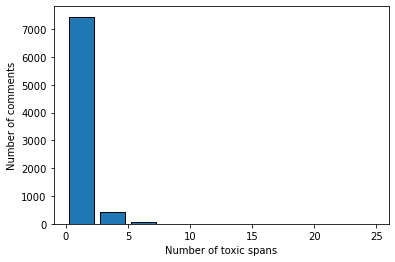

In [23]:
%matplotlib inline

fig, ax = plt.subplots()
ax.hist(len_toxic_words, density=False, edgecolor='k', rwidth=0.8)  # density=False would make counts

plt.xlabel('Number of toxic spans')
plt.ylabel('Number of comments')